<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Machine_Learning/Tree_based/03-01-02-08-05-tree-based-models-bagging-grf-instrumental-forest-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.8.5 Instrumental Forest

An **Instrumental Forest** is a machine learning method, specifically an extension of the Generalized Random Forests (GRF) framework, used to estimate **conditional local average treatment effects (LATE)** in observational data studies or experiments with imperfect compliance. It combines the principles of instrumental variable (IV) analysis with random forest techniques to address issues of endogeneity and heterogeneity in treatment effects. It is particularly useful in causal inference for estimating how a treatment impacts an outcome when influenced by an instrument, accounting for confounding variables.

## Overview

An Instrumental Forest is designed to estimate treatment effects using an **instrumental variable (Z)**, which is a variable that affects the treatment assignment (W) but does not directly affect the outcome (Y) except through the treatment. The forest estimates the conditional local average treatment effect, denoted as **τ(X)**, which represents the treatment effect for specific covariate values (X). Formally, it estimates:

$$ τ(X) = \frac{Cov[Y, Z | X = x]}{ Cov[W, Z | X = x]} $$

Where:

-   $Y$: Outcome variable (e.g., health outcome, sales, etc.).
-   $W$: Treatment assignment (e.g., whether a patient received a drug).
-   $Z$ Instrument (e.g., a randomized encouragement to take the drug).
-   $X$: Covariates (e.g., patient characteristics like age, gender).
-   $Cov[Y, Z | X = x]$: Covariance between the outcome and instrument given covariates.
-   $Cov[W, Z | X = x]$: Covariance between the treatment and instrument given covariates.

When the instrument $Z$ and treatment $W$ are the same, the Instrumental Forest reduces to a Causal Forest, a related method for estimating causal effects without instruments.



### Instrumental variable (IV)

An **instrumental variable (IV)** is a tool used in statistics and econometrics to estimate causal relationships when a randomized controlled trial is not feasible, or when there is concern about endogeneity—i.e., when the treatment or exposure variable is correlated with unobserved factors that also affect the outcome. IV methods help isolate the causal effect of a treatment (or independent variable) on an outcome by leveraging an external variable, called the instrument, that influences the treatment but does not directly affect the outcome except through the treatment.

The **Conditional Local Average Treatment Effect (LATE)** is a causal effect measure used in instrumental variable (IV) analysis to estimate the effect of a treatment (or exposure) on an outcome for a specific subpopulation, known as the "compliers," conditional on a set of covariates $X$. It extends the Local Average Treatment Effect (LATE) by allowing the treatment effect to vary across different values of covariates, making it particularly useful in heterogeneous treatment effect estimation.

### How It Work

Instrumental Forests build on decision trees and random forests to estimate heterogeneous treatment effects while addressing endogeneity (i.e., when the treatment assignment is correlated with unobserved factors affecting the outcome). Here’s a step-by-step explanation of how it works:

1.  Input Data

-   `Covariates (X)`: Features or characteristics of the units (e.g., patients, customers).
-   `Outcome (Y)`: The variable of interest (e.g., recovery rate, revenue).
-   `Treatment (W)`: The intervention or exposure (binary or continuous).
-   `Instrument (Z)`: A variable that influences W but is uncorrelated with unmeasured confounders affecting Y.
-   Optional: Pre-estimated values like $\hat{Y}$ (expected outcome), $\hat{W}$ (treatment propensity), and $\hat{Z}$ (instrument propensity) can be provided; otherwise, they are estimated using regression forests.

2.  Tree Construction

-   The algorithm constructs multiple decision trees, each splitting the data based on covariates (X) to maximize differences in the estimated treatment effect $τ(X)$.

-   Unlike standard random forests, Instrumental Forests use an `instrumental variable splitting criterion`. Splits are chosen to maximize the heterogeneity in the treatment effect while accounting for the instrument’s role in isolating exogenous variation in $W$.

-   Parameters like `min.node.size` (minimum observations per tree leaf), `sample.fraction` (fraction of data used per tree), and `mtry` (number of features considered for splitting) control the tree structure.

-   `Honesty`: The algorithm can use “honest splitting” (separating data for split selection and effect estimation) to reduce bias. The `honesty.fraction` parameter determines the proportion of data used for splitting.

3.  Instrumental Variable Estimation

-   For each leaf in a tree, the algorithm estimates $τ(X)$ using the instrumental variable formula:

$$ \tau(X) = \frac{\text{Cov}[Y - \hat{Y}, Z - \hat{Z} | X = x]}{\text{Cov}[W - \hat{W}, Z - \hat{Z} | X = x]} $$

-   This isolates the causal effect of $W$ on $Y$ by leveraging the exogenous variation induced by Z, mitigating bias from unmeasured confounders.

4.  Forest Aggregation

-   Multiple trees are grown (a “forest”), each using a random subset of the data and features to ensure robustness and reduce overfitting.

-   The final estimate for $τ(X)$ at a given covariate value X = x is the average of the treatment effect estimates across all trees where x falls into a leaf.

5.  Prediction

-   For new data points (or out-of-bag training samples), the forest predicts $τ(X)$ by averaging the estimates from all trees.

-   Optionally, confidence intervals can be computed if the $ci.group.size$ parameter is set to at least 2, allowing for uncertainty quantification.

6.  Tuning

-   Instrumental Forests are sensitive to hyperparameters (e.g., `min.node.size`, `alpha`, `imbalance.penalty`). Tuning these parameters is critical for accurate estimation, as suboptimal settings can lead to poor performance, especially in IV settings where effects are often weak.

-   Tuning can be automated using methods like cross-validation to minimize the “debiased error” (a measure of estimation accuracy).[ ](https://github.com/grf-labs/grf/issues/501)

7.  Output

-   A trained Instrumental Forest object containing the estimated treatment effects **τ(X)** for each data point, along with metadata like the seed, number of threads, and tuning parameters.
-   Predictions can be made for new data or out-of-bag (OOB) samples, providing estimates of the treatment effect conditional on covariates.

### Key Features and Considerations:

-   `Endogeneity Correction`: [By using an instrument, the forest corrects for biases due to unmeasured confounders, unlike standard regression or causal forests](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)

-   `Heterogeneous Effects`:[It captures how treatment effects vary across subgroups defined by covariates (X), making it suitable for personalized medicine, targeted marketing, etc](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)

-   `Challenges`:

-   Requires a valid instrument ($Z$ must affect $W$ but not $Y$ directly, except through $W$).

-   Sensitive to tuning parameters, which can significantly impact performance.[ ](https://github.com/grf-labs/grf/issues/501)

-   Computationally intensive, especially for large datasets or when tuning is involved.

-   `Applications`: [Used in fields like economics, medicine, and policy evaluation to estimate causal effects in observational data studies, such as the effect of early surgery on patient outcomes or laparoscopic colectomy in hospitals](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-022-01663-0)[ ](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)


### Between Instrumental Forest and Causal Forests

Both Instrumental Forests and Causal Forests are machine learning methods within the `Generalized Random Forests (GRF)` framework, implemented in the `{grf}` package in R, designed for estimating causal effects\* in observational data or experimental settings. They aim to estimate `heterogeneous treatment effects` (i.e., how the effect of a treatment varies across subgroups defined by covariates). However, they differ in their assumptions, use cases, and how they handle endogeneity. Below is a detailed comparison of Instrumental Forests`and Causal Forests`, including their differences, similarities, and when to use each.

| **Aspect** | **Causal Forest** | **Instrumental Forest** |
|------------------|---------------------------|---------------------------|
| `Purpose` | Estimates CATE for a treatment assuming unconfoundedness. | Estimates LATE using an instrumental variable to address endogeneity. |
| `Key Assumption` | Unconfoundedness: Treatment assignment $W$ is independent of potential outcomes $Y(0), Y(1)$ given covariates $X$. | Valid instrument: $Z$ affects $W$, not $Y$ directly (exclusion restriction), and is uncorrelated with confounders (independence). |
| `Treatment (W)` | Binary or continuous, assumed exogenous (random or conditionally random given $X$). | Binary or continuous, potentially endogenous (affected by unobserved confounders). |
| `Instrument (Z)` | Not required (assumes $W = Z$). | Required: A variable that influences $W$ but not $Y$ except through $W$. |
| `Endogeneity` | Cannot handle unobserved confounding. | Explicitly addresses unobserved confounding via the instrument. |
| `Estimation Formula` | $\tau(X) = E[Y(1) - Y(0) | X = x]$ | $\tau(X) = \frac{\text{Cov}[Y - \hat{Y}, Z - \hat{Z} | X = x]}{\text{Cov}[W - \hat{W}, Z - \hat{Z} | X = x]}$ |
| `Use Case` | Randomized experiments or observational studies with strong unconfoundedness. | Observational studies with endogeneity or imperfect compliance in experiments. |
| `Output` | CATE for the entire treated population. | LATE for the subpopulation of compliers (those whose ( W ) is influenced by ( Z )). |


## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314972 sha256=9c4a0f56c2894e92b2630cce0d2b87f2214da4485c5171ca3246282c1de26876
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Instrumental Forest with R

This tutorial demonstrates how to implement an Instrumental Forest using the `{grf}` package in R, focusing on estimating treatment effects in a hypothetical scenario using the lung dataset. The lung dataset is commonly used for survival analysis and contains information about patients with lung cancer, including their treatment and survival outcomes.



### Load and Check Required Libraries

In [3]:
%%R
packages <- c('tidyverse',
              'plyr',
              'grf',
              'survival',
              'mlbench',
              'Metrics')

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      plyr       grf  survival   mlbench   Metrics 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 


### Load R Packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))


### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:Metrics"   "package:mlbench"   "package:survival" 
 [4] "package:grf"       "package:plyr"      "package:lubridate"
 [7] "package:forcats"   "package:stringr"   "package:dplyr"    
[10] "package:purrr"     "package:readr"     "package:tidyr"    
[13] "package:tibble"    "package:ggplot2"   "package:tidyverse"
[16] "package:tools"     "package:stats"     "package:graphics" 
[19] "package:grDevices" "package:utils"     "package:datasets" 
[22] "package:methods"   "package:base"     


### Load and Prepare the Lung Dataset

For this tutorial, we will construct a hypothetical instrumental variable scenario since the lung dataset does not naturally include an instrument. The goal is to estimate the effect of a treatment (e.g., a hypothetical surgical intervention) on survival time, using an instrument (e.g., a randomized encouragement to undergo surgery).

-   We select covariates $X$, survival time $Y$, and simulate a binary treatment ($W$: surgery uptake) and instrument ($Z$: randomized encouragement).

-   A latent confounder ($Q$) is simulated to introduce endogeneity, mimicking real-world scenarios where treatment assignment is not random.

-   The true treatment effect ($\tau$) is set to decrease with age, and the outcome is generated as a function of covariates, treatment, confounder, and noise.


In [6]:
%%R
# Load Data
data(lung, package = "survival")
# Remove rows with missing values for simplicity
lung <- lung[complete.cases(lung), ]
# Covariates (X): age, sex, ph.ecog (ECOG performance score), wt.loss (weight loss)
X <- lung[, c("age", "sex", "ph.ecog", "wt.loss")]
# Outcome (Y): Survival time (time)
Y <- lung$time
# Status (1 = death, 0 = censored); for simplicity, we assume all events are observed
# In practice, censoring should be handled appropriately
status <- lung$status - 1  # Convert to 0/1 (1 = death)

# Simulate a treatment and instrument
set.seed(123)  # For reproducibility
n <- nrow(lung)
# Simulated instrument (Z): Randomized encouragement to undergo surgery (binary)
Z <- rbinom(n, 1, 0.5)
# Simulated confounder (Q): Latent health condition affecting treatment and outcome
Q <- rbinom(n, 1, 0.5)
# Simulated treatment (W): Surgery uptake, influenced by Z and Q
W <- as.numeric(runif(n) < 0.3 + 0.4 * Z + 0.2 * Q)  # Treatment probability depends on Z and Q
# Simulate true treatment effect: Varies by age (stronger effect for younger patients)
tau <- 100 * (1 - (X$age - min(X$age)) / (max(X$age) - min(X$age)))  # Linearly decreasing with age
# Simulated outcome: Y = baseline + treatment effect * W + confounder + noise
Y <- 200 + tau * W + 50 * Q + rnorm(n, 0, 50)

### Training an Instrumental Forest

We will use the `instrumental_forest()` function from the `{grf}` package to estimate the treatment effects. The function requires covariates, outcome, treatment, and instrument as inputs. Below `instrumental_forest()` parameters:

-   `X`: Covariates
-   `Y`: Outcome (survival time)
-   `W`: Treatment (surgery uptake)
-   `Z`: Instrument (encouragement)
-   `num`.trees: Number of trees (default 2000)
-   `honesty`: Use honest splitting for unbiased estimates
-   `tune.parameters`: Automatically tune hyperparameters


In [8]:
%%R
# Train an instrumental forest
iv_forest <- instrumental_forest(
  X = X,
  Y = Y,
  W = W,
  Z = Z,
  num.trees = 1000,  # Reduced for speed; increase for better accuracy
  honesty = TRUE,
  tune.parameters = "all"  # Automatically tune parameters
)
iv_forest

GRF forest object of type instrumental_forest 
Number of trees: 1000 
Number of training samples: 167 
Variable importance: 
1 2 3 4 
0 0 0 0 


### Predicting Treatment Effects

In [9]:
%%R
# Predict treatment effects
# Out-of-bag predictions for training data
iv_pred <- predict(iv_forest)
tau_hat <- iv_pred$predictions  # Estimated treatment effects

# Step 6: Summarize results
# Average treatment effect (ATE)
ate <- average_treatment_effect(iv_forest)
cat("Average Treatment Effect (ATE):", round(ate["estimate"], 2),
    "+/-", round(1.96 * ate["std.err"], 2), "\n")

# Compare estimated vs. true treatment effects
results <- data.frame(
  Age = X$age,
  True_Tau = tau,
  Estimated_Tau = tau_hat
)
head(results, 10)  # Display first 10 rows of results)


Average Treatment Effect (ATE): 63.18 +/- 43.8 
   Age True_Tau Estimated_Tau
1   68 32.55814      77.50334
2   57 58.13953      80.13024
3   74 18.60465      77.97821
4   68 32.55814      77.39293
5   71 25.58140      80.87128
6   53 67.44186      75.93521
7   61 48.83721      77.18662
8   57 58.13953      78.38655
9   57 58.13953      75.40800
10  70 27.90698      76.59893


### Visualizing Results

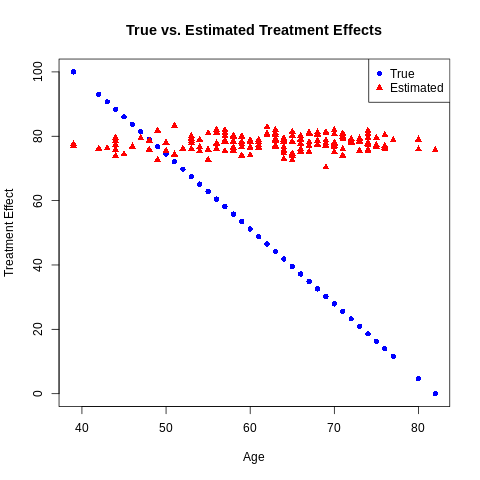

In [10]:
%%R
# Plot true vs. estimated treatment effects
plot(results$Age, results$True_Tau, col = "blue", pch = 16,
     xlab = "Age", ylab = "Treatment Effect", main = "True vs. Estimated Treatment Effects")
points(results$Age, results$Estimated_Tau, col = "red", pch = 17)
legend("topright", legend = c("True", "Estimated"), col = c("blue", "red"), pch = c(16, 17))

### Predicting Treatment Effects for New Data

In [11]:
%%R
# Predict treatment effects for new data
# Example: Predict for a new patient (age = 60, male, ph.ecog = 1, wt.loss = 10)
new_patient <- data.frame(age = 60, sex = 1, ph.ecog = 1, wt.loss = 10)
new_pred <- predict(iv_forest, newdata = new_patient)
cat("Predicted treatment effect for new patient:", round(new_pred$predictions, 2), "\n")

Predicted treatment effect for new patient: 77.88 


### Evaluate Model Performance

In [12]:
%%R
# Evaluate model performance
# Compute debiased error (if tuned)
tuning_info <- iv_forest$debiased.error
cat("Debiased error (if tuned):", round(mean(tuning_info, na.rm = TRUE), 4), "\n")

Debiased error (if tuned): 3876.876 


 - In practice, use a valid instrument ($Z$) that satisfies IV assumptions.

 - Handle censoring in survival data appropriately (e.g., using inverse probability weighting).

 - Increase num.trees and adjust tuning parameters for better accuracy.

 - Check instrument strength using first-stage regression diagnostics.

## Summary and Conclusion

Instrumental Forest is a powerful tool for estimating treatment effects in the presence of endogeneity, leveraging the strengths of random forests and instrumental variable analysis. It allows researchers to estimate heterogeneous treatment effects while addressing confounding issues, making it suitable for various applications in causal inference. This tutorial provided a step-by-step guide to implementing an Instrumental Forest using the `{grf}` package in R, demonstrating how to estimate treatment effects in a simulated scenario with a hypothetical surgical intervention and an instrument. At end of the tutorial, we summarized the results, including the average treatment effect and a comparison of true vs. estimated treatment effects. The code can be adapted to real-world datasets with appropriate instruments and covariates.

## References

## References

1.   [Athey, Susan, Julie Tibshirani, and Stefan Wager. "Generalized Random Forests." Annals of Statistics, 47(2), 2019](https://grf-labs.github.io/grf/reference/instrumental_forest.html)[ ](https://rdrr.io/cran/grf/man/instrumental_forest.html)

2.   [Chernozhukov, Victor, and Christian Hansen. "The reduced form: A simple approach to inference with weak instruments." Economics Letters, 100(1), 2008.](https://github.com/grf-labs/grf/issues/501)

3.  [Wang, Guihua, et al. "An Instrumental Variable Forest Approach for Detecting Heterogeneous Treatment Effects in Observational Studies." Management Science, 2021](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)